# Marketing Analytics- For E-Commerce Market Place Company

#### IMPORTING PACKAGES

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [42]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [43]:
# Create Data audit Report for categorical variables
def categorical_var_summary( x ):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [44]:
# Missing value imputation for continuous variables
def missing_imputation( x, stats = 'mean' ):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    return x

In [45]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

#### IMPORTING DATA

In [46]:
path='C:\\Users\\Aniket Aggarwal\\OneDrive\\Desktop\\an\\python\\Python Foundation End to End Case Study E-Commerce Analytics Project\\'

In [47]:
l= ['Customers','Sellers','Products','Orders','Order_Items','Order_Payments','Order_Review_Ratings','Geo_Location']
for i in l :
    globals()[i]=pd.read_csv(path+i+'.csv')

### Joining the datasets 

In [48]:
m1=Orders.merge(right=Order_Items,how='right',on='order_id')

In [49]:
m2=m1.merge(right=Sellers,how='left',on='seller_id')

In [50]:
m3=m2.merge(right=Products,how='left',on='product_id')

In [51]:
m4=m3.merge(right=Order_Payments,how='left',on='order_id')

In [52]:
df=m4.merge(right=Geo_Location,how='left',left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [53]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,9/13/2017 8:59,9/13/2017 9:45,9/19/2017 18:34,9/20/2017 23:43,9/29/2017 0:00,1,4244733e06e7ecb4970a6e2683c13e61,...,14.0,1.0,credit_card,2.0,72.19,27277.0,-22.498183,-44.123614,Serilingampalle,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,4/26/2017 10:53,4/26/2017 11:05,5/4/2017 14:35,5/12/2017 16:04,5/15/2017 0:00,1,e5f2d52b802189ee658865ca93d83a8f,...,40.0,1.0,credit_card,3.0,259.83,3471.0,-23.566258,-46.518417,Akkarampalle,Andhra Pradesh
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,1/14/2018 14:33,1/14/2018 14:48,1/16/2018 12:36,1/22/2018 13:19,2/5/2018 0:00,1,c777355d18b72b67abbeef9df44fd0fd,...,33.0,1.0,credit_card,5.0,216.87,37564.0,-22.264094,-46.158564,Goredi Chancha,Rajasthan
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,8/8/2018 10:00,8/8/2018 10:10,8/10/2018 13:28,8/14/2018 13:32,8/20/2018 0:00,1,7634da152a4610f1595efa32f14722fc,...,15.0,1.0,credit_card,2.0,25.78,14403.0,-20.548228,-47.395897,Adilabad,Andhra Pradesh
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2/4/2017 13:57,2/4/2017 14:10,2/16/2017 9:46,3/1/2017 16:42,3/17/2017 0:00,1,ac6c3623068f30de03045865e4e10089,...,30.0,1.0,credit_card,3.0,218.04,87900.0,-22.931427,-53.133759,Kumhari,Chhattisgarh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,4/23/2018 13:57,4/25/2018 4:11,4/25/2018 12:09,5/10/2018 22:56,5/18/2018 0:00,1,4aa6014eceb682077f9dc4bffebc05b0,...,40.0,1.0,UPI,1.0,343.40,88303.0,-26.912429,-48.677381,Sadasivpet,Andhra Pradesh
117600,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,7/14/2018 10:26,7/17/2018 4:31,7/17/2018 8:05,7/23/2018 20:31,8/1/2018 0:00,1,32e07fd915822b0765e448c4dd74c828,...,38.0,1.0,UPI,1.0,386.53,1206.0,-23.535536,-46.643052,Akkarampalle,Andhra Pradesh
117601,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,10/23/2017 17:07,10/24/2017 17:14,10/26/2017 15:13,10/28/2017 12:22,11/10/2017 0:00,1,72a30483855e2eafc67aee5dc2560482,...,19.0,1.0,credit_card,3.0,116.85,80610.0,-25.469214,-49.293935,Anakapalle,Andhra Pradesh
117602,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,8/14/2017 23:02,8/15/2017 0:04,8/15/2017 19:02,8/16/2017 21:59,8/25/2017 0:00,1,9c422a519119dcad7575db5af1ba540e,...,20.0,1.0,credit_card,3.0,64.71,4733.0,-23.636657,-46.694780,Akkarampalle,Andhra Pradesh


In [54]:
df.head(2).T

,0,1
order_id,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3
customer_id,3ce436f183e68e07877b285a838db11a,f6dd3ec061db4e3987629fe6b26e5cce
order_status,delivered,delivered
order_purchase_timestamp,9/13/2017 8:59,4/26/2017 10:53
order_approved_at,9/13/2017 9:45,4/26/2017 11:05
order_delivered_carrier_date,9/19/2017 18:34,5/4/2017 14:35
order_delivered_customer_date,9/20/2017 23:43,5/12/2017 16:04
order_estimated_delivery_date,9/29/2017 0:00,5/15/2017 0:00
order_item_id,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,e5f2d52b802189ee658865ca93d83a8f


In [55]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

#### dropping unnecessary columns

In [56]:
df.drop([ 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm','geolocation_lat',
       'geolocation_lng', 'seller_city',
       'seller_state'],axis=1,inplace=True)

## Data inspection

In [57]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code_prefix',
       'product_category_name', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'geolocation_zip_code_prefix',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117604 entries, 0 to 117603
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117604 non-null  object 
 1   customer_id                    117604 non-null  object 
 2   order_status                   117604 non-null  object 
 3   order_purchase_timestamp       117604 non-null  object 
 4   order_approved_at              117589 non-null  object 
 5   order_delivered_carrier_date   116359 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  117604 non-null  object 
 8   order_item_id                  117604 non-null  int64  
 9   product_id                     117604 non-null  object 
 10  seller_id                      117604 non-null  object 
 11  shipping_limit_date            117604 non-null  object 
 12  price                         

In [59]:
df.shape

(117604, 23)

In [60]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,seller_zip_code_prefix,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,9/13/2017 8:59,9/13/2017 9:45,9/19/2017 18:34,9/20/2017 23:43,9/29/2017 0:00,1,4244733e06e7ecb4970a6e2683c13e61,...,13.29,27277,Cool_Stuff,1.0,credit_card,2.0,72.19,27277.0,Serilingampalle,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,4/26/2017 10:53,4/26/2017 11:05,5/4/2017 14:35,5/12/2017 16:04,5/15/2017 0:00,1,e5f2d52b802189ee658865ca93d83a8f,...,19.93,3471,Pet_Shop,1.0,credit_card,3.0,259.83,3471.0,Akkarampalle,Andhra Pradesh
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,1/14/2018 14:33,1/14/2018 14:48,1/16/2018 12:36,1/22/2018 13:19,2/5/2018 0:00,1,c777355d18b72b67abbeef9df44fd0fd,...,17.87,37564,Furniture_Decor,1.0,credit_card,5.0,216.87,37564.0,Goredi Chancha,Rajasthan
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,8/8/2018 10:00,8/8/2018 10:10,8/10/2018 13:28,8/14/2018 13:32,8/20/2018 0:00,1,7634da152a4610f1595efa32f14722fc,...,12.79,14403,Perfumery,1.0,credit_card,2.0,25.78,14403.0,Adilabad,Andhra Pradesh
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2/4/2017 13:57,2/4/2017 14:10,2/16/2017 9:46,3/1/2017 16:42,3/17/2017 0:00,1,ac6c3623068f30de03045865e4e10089,...,18.14,87900,Garden_Tools,1.0,credit_card,3.0,218.04,87900.0,Kumhari,Chhattisgarh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,4/23/2018 13:57,4/25/2018 4:11,4/25/2018 12:09,5/10/2018 22:56,5/18/2018 0:00,1,4aa6014eceb682077f9dc4bffebc05b0,...,43.41,88303,Housewares,1.0,UPI,1.0,343.40,88303.0,Sadasivpet,Andhra Pradesh
117600,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,7/14/2018 10:26,7/17/2018 4:31,7/17/2018 8:05,7/23/2018 20:31,8/1/2018 0:00,1,32e07fd915822b0765e448c4dd74c828,...,36.53,1206,Computers_Accessories,1.0,UPI,1.0,386.53,1206.0,Akkarampalle,Andhra Pradesh
117601,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,10/23/2017 17:07,10/24/2017 17:14,10/26/2017 15:13,10/28/2017 12:22,11/10/2017 0:00,1,72a30483855e2eafc67aee5dc2560482,...,16.95,80610,Sports_Leisure,1.0,credit_card,3.0,116.85,80610.0,Anakapalle,Andhra Pradesh
117602,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,8/14/2017 23:02,8/15/2017 0:04,8/15/2017 19:02,8/16/2017 21:59,8/25/2017 0:00,1,9c422a519119dcad7575db5af1ba540e,...,8.72,4733,Computers_Accessories,1.0,credit_card,3.0,64.71,4733.0,Akkarampalle,Andhra Pradesh


In [61]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
seller_zip_code_prefix             int64
product_category_name             object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
geolocation_zip_code_prefix      float64
geolocation_city                  object
geolocation_state                 object
dtype: object

In [62]:
df['order_delivered_customer_date']=pd.to_datetime(df.order_delivered_customer_date )
df['order_estimated_delivery_date']=pd.to_datetime(df.order_estimated_delivery_date)
df['shipping_limit_date']=pd.to_datetime(df.shipping_limit_date)
df['order_approved_at']=pd.to_datetime(df.order_approved_at)
df['order_delivered_carrier_date']=pd.to_datetime(df.order_delivered_carrier_date)
df['order_purchase_timestamp']=pd.to_datetime(df.order_purchase_timestamp)


In [63]:
df.geolocation_zip_code_prefix=df.geolocation_zip_code_prefix.astype('object')

In [64]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
seller_zip_code_prefix                    int64
product_category_name                    object
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
geolocation_zip_code_prefix             

In [65]:
df_conti_vars = df.select_dtypes(include = ['float64'])
df_cat = df.select_dtypes(include = ['object'])

In [66]:
df_cat.describe().T

,count,unique,top,freq
order_id,117604,98666,895ab968e7bb0d5659d16cd74cd1650c,63
customer_id,117604,98666,270c23a11d024a44c896d1894b261a83,63
order_status,117604,7,delivered,115038
product_id,117604,32951,aca2eb7d00ea1a7b8ebd4e68314663af,536
seller_id,117604,3095,4a3ca9315b744ce9f8e9374361493884,2133
product_category_name,115881,71,Bed_Bath_Table,11823
payment_type,117601,4,credit_card,86769
geolocation_zip_code_prefix,117343.0,2218.0,14940.0,8242.0
geolocation_city,117343,529,Akkarampalle,34189
geolocation_state,117343,19,Andhra Pradesh,81590


In [67]:
df_conti_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
price,117604.0,120.822849,184.477367,0.85,39.90,74.90,134.90,6735.00
freight_value,117604.0,20.045551,15.861351,0.00,13.08,16.29,21.19,409.68
payment_sequential,117601.0,1.093528,0.726692,1.00,1.00,1.00,1.00,29.00
payment_installments,117601.0,2.939482,2.774223,0.00,1.00,2.00,4.00,24.00
payment_value,117601.0,172.686752,267.592290,0.00,60.87,108.21,189.26,13664.08


In [68]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
product_category_name            1723
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
geolocation_zip_code_prefix       261
geolocation_city                  261
geolocation_state                 261
dtype: int64

In [69]:
df.product_category_name.fillna('Unknown',inplace=True)

In [70]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
product_category_name               0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
geolocation_zip_code_prefix       261
geolocation_city                  261
geolocation_state                 261
dtype: int64

## Detailed exploratory analysis

### High level metrics

In [71]:
Order_Payments.payment_value.sum()

16008872.12

In [72]:
Orders.shape[0]

99441

In [73]:
df.product_category_name.nunique()

72

In [74]:
df.product_id.nunique()

32951

In [75]:
df.seller_id.nunique()

3095

In [76]:
Customers.customer_city.nunique(),Customers.customer_state.nunique()

(4119, 20)

In [77]:
Sellers.seller_city.nunique(),Sellers.seller_state.nunique()

(534, 19)

In [78]:
Order_Payments.payment_type.value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [79]:
df[df.order_status=='delivered'].shape[0],df[df.order_status=='delivered'].shape[0]*100/df.shape[0]

(115038, 97.8181014251216)

In [80]:
df.order_status.value_counts()

delivered      115038
shipped          1244
canceled          566
processing        375
invoiced          371
unavailable         7
approved            3
Name: order_status, dtype: int64

In [81]:
df[df.order_status=='canceled'].shape[0],df[df.order_status=='canceled'].shape[0]*100/df.shape[0]

(566, 0.4812761470698276)

In [82]:
(df.pivot_table(index='product_category_name',values='order_id',aggfunc='count')).sort_values(by='order_id',ascending=False).iloc[0:5]

,order_id
product_category_name,
Bed_Bath_Table,11823
Health_Beauty,9975
Sports_Leisure,8945
Furniture_Decor,8744
Computers_Accessories,8082


In [83]:
df.pivot_table(index='customer_id',values=['price','freight_value'],aggfunc='sum').sort_values(by='price',ascending=False).iloc[0:5]

,freight_value,price
customer_id,,
1617b1357756262bfa56ab541c47bc16,224.08,13440.00
9af2372a1e49340278e7c1ef8d749f34,1897.76,11383.95
de832e8dbb1f588a47013e53feaa67cc,255.30,10856.10
63b964e79dee32a3587651701a2b8dbf,665.28,9888.00
6f241d5bbb142b6f764387c8c270645a,535.08,9520.14


In [84]:
df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,seller_zip_code_prefix,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,...,13.29,27277,Cool_Stuff,1.0,credit_card,2.0,72.19,27277.0,Serilingampalle,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,...,19.93,3471,Pet_Shop,1.0,credit_card,3.0,259.83,3471.0,Akkarampalle,Andhra Pradesh


### New customers acquired every month


In [85]:
df['month']=[x.strftime('%y-%m') for x in df.order_purchase_timestamp]

In [114]:
df[df.customer_id.duplicated()==False].groupby('month').agg({'customer_id': pd.Series.nunique})

,customer_id
month,
16-09,3
16-10,308
16-12,1
17-01,789
17-02,1733
17-03,2641
17-04,2391
17-05,3660
17-06,3217


### Retention rate

In [91]:
monthly_customer_counts_shifted = monthly_customer_counts.shift(1)

In [93]:
retention_rate = monthly_customer_counts.divide(monthly_customer_counts_shifted, fill_value=0).reset_index()
retention_rate = retention_rate.rename(columns={'customer_id': 'retention_rate'})

In [94]:
retention_rate

,year,month,retention_rate
0,2016,December,inf
1,2016,October,324.000000
2,2016,September,0.012346
3,2017,April,601.000000
4,2017,August,1.801581
5,2017,December,1.309859
6,2017,February,0.313767
7,2017,January,0.449438
8,2017,July,5.032500
9,2017,June,0.806011


###  Revenues from existing/new customers on month on month basis

In [124]:
df.groupby('month').agg({'payment_value':'sum'}) ### Revenue on monthly basis

,payment_value
month,
16-09,347.52
16-10,73914.58
16-12,19.62
17-01,187779.41
17-02,344134.79
17-03,526961.66
17-04,505665.53
17-05,724504.55
17-06,600753.27


In [125]:
df.groupby(['month','customer_id']).agg({'payment_value':'sum'}).head(20)   ### from each customer

payment_value
month customer_id                                    
16-09 08c5351a6aca1c1589a38f244edeee9d         272.46
      683c54fc24d40ee9f8a6fc179fd9856c          75.06
      86dc2ffce2dfff336de2f386a786e574           0.00
16-10 00474d2582fd72663036795b7ab8cfc1         217.68
      01415cfeb907d8ce0e17075b4c097fe9          45.01
      01be2c0c2d55c597b5ec011e26e4b0d1         263.93
      01f7b7a4e25cda9ce48c0f7263f7452d          75.33
      01fc05160cf790b9ed54ec795ff07688          24.52
      021833e9737a1145b5a6e3053f0f4329          38.62
      02cb3a8ef6e13d37560379559e2f533d          27.86
      031f08a1ebdcfb5e706831bf64de3860          71.20
      04356ca5b944f7a92d6b103bdb44268a          51.80
      04a043776b45158df5f274435321c199          34.42
      053716fea805d6b29d6f8b6113fefe4d         661.75
      06a70917afd2dcd59396e1eac836c646         184.87
      070db51ef1d6a1bd858c21b03de83e66          92.97
      076a5ddb5b1240c532093a399dcb47f5          74.15
      08c95eb831d93a76079d7e24a117db29         173.77
      0a9ee4d9030acbe428769c79d0c4da69         204.38
      0c63b4438ff050942153aaa4c19ad1d3         297.91

In [130]:
df.head(1).T

,0
order_id,00010242fe8c5a6d1ba2dd792cb16214
customer_id,3ce436f183e68e07877b285a838db11a
order_status,delivered
order_purchase_timestamp,2017-09-13 08:59:00
order_approved_at,2017-09-13 09:45:00
order_delivered_carrier_date,2017-09-19 18:34:00
order_delivered_customer_date,2017-09-20 23:43:00
order_estimated_delivery_date,2017-09-29 00:00:00
order_item_id,1
product_id,4244733e06e7ecb4970a6e2683c13e61


In [179]:
df['month_name']=[x.strftime('%m') for x in df.order_purchase_timestamp]
df['year']=[x.strftime('%Y') for x in df.order_purchase_timestamp]
df['weeknum']=df.order_purchase_timestamp.dt.isocalendar().week

In [180]:
df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_type,payment_installments,payment_value,geolocation_zip_code_prefix,geolocation_city,geolocation_state,month,month_name,year,weeknum
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,...,credit_card,2.0,72.19,27277.0,Serilingampalle,Andhra Pradesh,17-09,09,2017,37


#### Trend of sales and quantity by monthly

In [168]:
mon_trend=df.groupby('month_name')[['order_item_id','payment_value']].sum().reset_index().rename(columns={'order_item_id':'Quantity','payment_value':'sales'})

In [169]:
mon_trend

,month_name,Quantity,sales
0,01,11532,1596145.06
1,02,12054,1650183.59
2,03,13925,2002561.61
3,04,13301,2002477.05
4,05,15055,2231479.39
5,06,13190,1898348.08
6,07,14496,2088998.42
7,08,14980,2099749.62
8,09,6076,1016363.55
9,10,7361,1095083.85


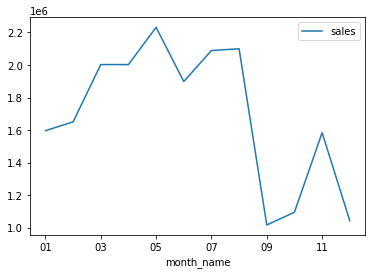

In [170]:
mon_trend.plot('month_name','sales')
plt.show()

In [171]:
year_trend=df.groupby('year')[['order_item_id','payment_value']].sum().reset_index().rename(columns={'order_item_id':'Quantity','payment_value':'sales'})

In [172]:
year_trend

,year,Quantity,sales
0,2016,486,74281.72
1,2017,63872,9160941.90
2,2018,76287,11072911.09


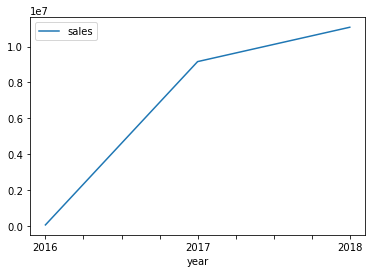

In [176]:
year_trend.plot('year','sales')
plt.show()

In [181]:
week_trend=df.groupby('weeknum')[['order_item_id','payment_value']].sum().reset_index().rename(columns={'order_item_id':'Quantity','payment_value':'sales'})

<AxesSubplot:xlabel='weeknum'>

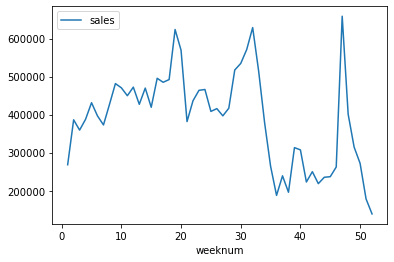

In [183]:
week_trend.plot('weeknum','sales')

####  Trend of sales and quantity by category by monthly basis 

In [145]:
df.pivot_table(columns='product_category_name',values=['payment_value','order_item_id'],index='month_name',aggfunc='sum').fillna(0)

order_item_id                         \
product_category_name Agro_Industry_And_Commerce Air_Conditioning   Art   
month_name                                                                
April                                       12.0             42.0  27.0   
August                                      33.0             45.0  25.0   
December                                    13.0              3.0   4.0   
February                                    81.0             26.0  15.0   
January                                     28.0             41.0  20.0   
July                                        33.0             24.0  25.0   
June                                        11.0             50.0  56.0   
March                                       48.0             46.0  14.0   
May                                         12.0             25.0  46.0   
November                                    35.0             22.0   2.0   
October                                      5.0             36.0   3.0   
September                                    5.0              8.0   3.0   

                                                                 \
product_category_name Arts_And_Craftmanship Audio   Auto   Baby   
month_name                                                        
April                                   1.0  48.0  501.0  393.0   
August                                  9.0  41.0  830.0  385.0   
December                                0.0  18.0  322.0  160.0   
February                                0.0  22.0  444.0  224.0   
January                                 0.0  28.0  344.0  310.0   
July                                   13.0  30.0  513.0  407.0   
June                                    0.0  33.0  483.0  370.0   
March                                   0.0  51.0  478.0  293.0   
May                                     3.0  40.0  502.0  424.0   
November                                0.0  42.0  292.0  240.0   
October                                 0.0  35.0  201.0  166.0   
September                               0.0  11.0  132.0  196.0   

                                                                            \
product_category_name Bed_Bath_Table Books_General_Interest Books_Imported   
month_name                                                                   
April                         1349.0                   71.0            6.0   
August                        1525.0                   69.0            2.0   
December                       687.0                   49.0            3.0   
February                      1061.0                   37.0            4.0   
January                       1277.0                   53.0            6.0   
July                          1519.0                   40.0           10.0   
June                          1501.0                   68.0           12.0   
March                         1402.0                   80.0            4.0   
May                           1462.0                   79.0           14.0   
November                      1254.0                   41.0            5.0   
October                        828.0                   18.0            0.0   
September                      674.0                   16.0            5.0   

                       ...          payment_value                   \
product_category_name  ... Signaling_And_Security Small_Appliances   
month_name             ...                                           
April                  ...                4746.39         38230.78   
August                 ...                3805.72         12665.68   
December               ...                 842.44          9701.91   
February               ...                1617.31         15018.71   
January                ...                1791.09         20240.82   
July                   ...               23024.34         18802.12   
June                   ...               24753.86         33450.94   
March                  ...      

#### Trend of sales by category by yearly basis 

In [143]:
df.pivot_table(values='payment_value',columns='product_category_name',index='year',aggfunc='sum').fillna(0)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Unknown,Watches_Gifts
year,,,,,,,,,,,,,,,,,,,,,
2016,0.00,4675.43,0.00,0.00,183.03,2716.70,2344.43,2291.71,144.54,0.00,...,0.00,0.00,0.00,3927.11,0.00,0.00,817.88,5670.74,95.92,3468.04
2017,65094.65,40746.85,12060.75,218.63,21200.17,396546.18,197887.52,797314.22,28039.70,1853.70,...,8126.30,113056.00,895.98,642014.31,128976.73,8072.67,208079.46,390826.83,148982.41,571399.60
2018,53635.96,45748.38,18932.18,2107.54,38941.42,453031.45,339613.71,912947.74,36510.52,4848.19,...,60361.75,112528.38,50333.34,746186.14,188463.34,1970.26,277984.71,222540.12,110233.46,854349.04


#### State and city wise sales 

In [192]:
city_sales=df.groupby(['geolocation_state','geolocation_city']).agg({'payment_value':'sum'}).sort_values(by="payment_value",ascending=False)

In [196]:
city_sales

payment_value
geolocation_state geolocation_city               
Andhra Pradesh    Akkarampalle         5080629.09
Gujarat           Tarsali              1052674.56
Andhra Pradesh    Anakapalle            654678.20
                  Vijayawada            573709.15
                  Bestavaripeta         510251.13
...                                           ...
Haryana           Jhajjar                   42.49
Andhra Pradesh    Bugganipalle              42.05
Maharashtra       Osmanabad                 38.37
                  Mahad                     28.22
Rajasthan         Galiakot                  25.69

[529 rows x 1 columns]

<AxesSubplot:ylabel='payment_value'>

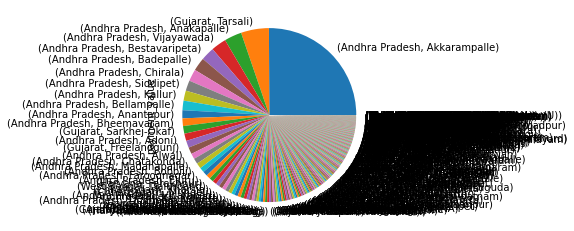

In [195]:
city_sales.plot(kind='pie',y='payment_value',legend=False)


In [200]:
pm_trends=df.pivot_table(index='month_name',columns='payment_type',values='payment_value',aggfunc='sum')

In [201]:
pm_trends

payment_type,UPI,credit_card,debit_card,voucher
month_name,,,,
01,315421.95,1225148.47,14245.21,41329.43
02,364236.08,1241274.98,11831.37,32841.16
03,363827.15,1584864.22,13875.51,39994.73
04,421846.70,1526379.61,17600.45,36650.29
05,469113.99,1700822.31,19330.02,42213.07
06,343422.95,1469938.78,43977.11,41009.24
07,466151.28,1531118.97,48788.97,42939.20
08,346334.46,1660626.76,55838.24,36950.16
09,187058.40,800623.91,5061.73,23619.51


<AxesSubplot:xlabel='month_name'>

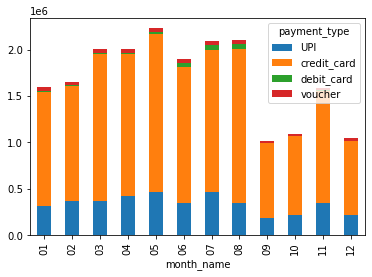

In [204]:
pm_trends.plot(kind='bar',stacked=True)


#### Popular Products by month, seller, state, category

##### by Category 

In [215]:
df.groupby(["product_id",'product_category_name']).agg({'order_item_id':'count','payment_value':'sum'}).sort_values(by='order_item_id',ascending=False).rename(columns={'order_item_id':'Quantity','payment_value':'sales'}).head(10)

,,Quantity,sales
product_id,product_category_name,,
aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor,536,63788.12
99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,525,63161.40
422879e10f46682990de24d770e7f83d,Garden_Tools,505,79512.22
389d119b48cf3043d311335e499d9c6b,Garden_Tools,406,48616.44
368c6c730842d78016ad823897a372db,Garden_Tools,395,52508.63
53759a2ecddad2bb87a079a1f1519f73,Garden_Tools,389,53445.35
d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,357,70557.90
53b36df67ebb7c41585e8d54d6772e08,Watches_Gifts,327,48994.30
154e7e31ebfa092203795c972e5804a6,Health_Beauty,283,11826.06


##### By month

In [218]:
df.groupby(['month_name',"product_id"]).agg({'order_item_id':'count','payment_value':'sum'}).reset_index()

,month_name,product_id,order_item_id,payment_value
0,01,001c5d71ac6ad696d22315953758fa04,1,100.64
1,01,002959d7a0b0990fe2d69988affcbc80,1,227.92
2,01,0043c62d00db47eff6a6bc4cf6bfaeda,1,548.13
3,01,005030ef108f58b46b78116f754d8d38,1,21.77
4,01,005c6b24cc96dca3e2c01e824401030e,1,58.60
...,...,...,...,...
60791,12,ffc0b406806006602c5853b00ab5f7fd,1,88.28
60792,12,ffce5ed9e0bcc2e46796b988cdac733b,1,410.61
60793,12,ffcfaba393e8ef71937c6e8421bc2868,1,620.68
60794,12,ffd34459c21034d1da6df9800de0d7a3,1,68.11


#### month wise popular products

In [228]:
df.groupby(['month',"product_id"]).agg({'order_item_id':'count','payment_value':'sum'}).reset_index().sort_values(by=['month','order_item_id'],ascending=[True,False]).rename(columns={'order_item_id':'Quantity','payment_value':'sales'}).drop_duplicates(keep='first',subset='month')

,month,product_id,Quantity,sales
0,16-09,5a6b04657a4c5ee34285d1e4619a96b4,3,0.00
257,16-10,eba7488e1c67729f045ab43fac426f2e,11,3493.37
278,16-12,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1,19.62
413,17-01,37eb69aca8718e843d897aa7b82f462d,15,11745.00
1216,17-02,42fffc68ff7e8176f11baaf4a4227557,13,1035.63
3013,17-03,7e0dc102074f8285580c9777f79c90cf,45,2803.49
4902,17-04,99a4788cb24856965c36a24e339b6058,41,4399.25
7009,17-05,99a4788cb24856965c36a24e339b6058,65,6924.66
8489,17-06,42a2c92a0979a949ca4ea89ec5c7b934,73,7126.94
12381,17-07,f1c7f353075ce59d8a6f3cf58f419c9c,63,14299.18


#### By seller

In [230]:
df.groupby(['seller_id',"product_id"]).agg({'order_item_id':'count','payment_value':'sum'}).reset_index().sort_values(by='order_item_id',ascending=False).rename(columns={'order_item_id':'Quantity','payment_value':'sales'}).head(10)

,seller_id,product_id,Quantity,sales
21025,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,536,63788.12
9881,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,519,62592.15
4645,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,505,79512.22
4643,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,406,48616.44
4642,1f50f920176fa81dab994f9023523100,368c6c730842d78016ad823897a372db,395,52508.63
4647,1f50f920176fa81dab994f9023523100,53759a2ecddad2bb87a079a1f1519f73,389,53445.35
22211,a1043bafd471dff536d0c462352beb48,d1c427060a0f73f6b889a5c7c61f2ac4,357,70557.90
26771,cc419e0650a3c5ba77189a1882b7556a,154e7e31ebfa092203795c972e5804a6,283,11826.06
30013,de722cd6dad950a92b7d4f82673f8833,3dd2a17168ec895c781a9191c1e95ad7,278,58962.14
26776,cc419e0650a3c5ba77189a1882b7556a,2b4609f8948be18874494203496bc318,266,28217.34


#### By state

In [236]:
df.groupby(['geolocation_state',"product_id"]).agg({'order_item_id':'count','payment_value':'sum'}).reset_index().sort_values(by='order_item_id',ascending=False).rename(columns={'order_item_id':'Quantity','payment_value':'sales'}).drop_duplicates(keep='first',subset='geolocation_state').head(10)

,geolocation_state,product_id,Quantity,sales
14939,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,536,63788.12
27812,Gujarat,99a4788cb24856965c36a24e339b6058,525,63161.40
33443,West Bengal,d1c427060a0f73f6b889a5c7c61f2ac4,357,70557.90
29555,Haryana,0aabfb375647d9738ad0f7b4ea3653b1,146,6309.03
24366,Delhi,08574b074924071f4e201e151b152b4e,115,19873.53
22980,Chhattisgarh,437c05a395e9e47f9762e677a7068ce7,90,6817.72
22435,Arunachal Pradesh,cec09725da5ed01471d9a505e7389d37,75,7906.63
32655,Maharashtra,b623b7cb05ee3248fbe4a6ecbeed79a4,73,7512.77
30670,Jammu & Kashmir,11875b30b49585209e608f40e8082e65,64,6417.09
32782,Orissa,e9a69340883a438c3f91739d14d3a56d,58,14138.01


#### Popular categories by state, month


In [238]:
df.groupby(['geolocation_state',"product_category_name"]).agg({'order_item_id':'count','payment_value':'sum'}).reset_index().sort_values(by='order_item_id',ascending=False).rename(columns={'order_item_id':'Quantity','payment_value':'sales'}).drop_duplicates(keep='first',subset='geolocation_state').head(10)

,geolocation_state,product_category_name,Quantity,sales
42,Andhra Pradesh,Health_Beauty,7859,1245660.68
206,Gujarat,Bed_Bath_Table,6527,854315.95
132,Chhattisgarh,Housewares,673,109599.31
383,Karnataka,Furniture_Decor,547,75292.51
266,Haryana,Computers_Accessories,543,225510.12
601,West Bengal,Garden_Tools,449,83533.48
355,Jammu & Kashmir,Sports_Leisure,433,49201.21
89,Arunachal Pradesh,Sports_Leisure,406,57115.66
455,Madhya Pradesh,Sports_Leisure,357,60979.79
536,Rajasthan,Luggage_Accessories,305,29347.02


In [239]:
df.groupby(['month',"product_category_name"]).agg({'order_item_id':'count','payment_value':'sum'}).reset_index().sort_values(by=['month','order_item_id'],ascending=[True,False]).rename(columns={'order_item_id':'Quantity','payment_value':'sales'}).drop_duplicates(keep='first',subset='month')

,month,product_category_name,Quantity,sales
1,16-09,Health_Beauty,3,0.00
21,16-10,Furniture_Decor,75,10852.54
35,16-12,Fashion_Bags_Accessories,1,19.62
57,17-01,Furniture_Decor,198,27882.80
107,17-02,Furniture_Decor,281,35889.13
158,17-03,Furniture_Decor,343,41781.58
191,17-04,Bed_Bath_Table,307,36794.55
251,17-05,Bed_Bath_Table,419,46809.66
309,17-06,Bed_Bath_Table,420,50329.08
370,17-07,Bed_Bath_Table,622,101051.68


#### Top 10 most expensive products sorted by price


In [242]:
df.groupby('product_id').agg({'payment_value':'sum'}).reset_index().sort_values(by='payment_value',ascending=False).head(10)

,product_id,payment_value
11352,5769ef0a239114ac3a854af00df129e4,109312.64
24086,bb50f2e236e5eea0100680137654686c,81887.42
8613,422879e10f46682990de24d770e7f83d,79512.22
27039,d1c427060a0f73f6b889a5c7c61f2ac4,70557.90
14068,6cdd53843498f92890544667809f1595,64825.67
27544,d5991653e037ccb7af6ed7d94246b249,64143.26
22112,aca2eb7d00ea1a7b8ebd4e68314663af,63788.12
21302,a62e25e09e05e6faf31d90c6ec1aa3d1,63167.37
19742,99a4788cb24856965c36a24e339b6058,63161.40
8051,3dd2a17168ec895c781a9191c1e95ad7,58962.14


## Customers/sellers Segmentation


### Divide the customers into groups based on the revenue generated

In [245]:
cust_data=df.groupby('customer_id')[['payment_value']].sum().reset_index()

In [248]:
cust_data

,customer_id,payment_value
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
98662,fffecc9f79fd8c764f843e9951b11341,81.36
98663,fffeda5b6d849fbd39689bb92087f431,63.13
98664,ffff42319e9b2d713724ae527742af25,214.13


In [255]:
cust_data['decile_grp'] = pd.cut(cust_data.payment_value,bins=5,labels= np.arange(1,6))

In [256]:
cust_data.decile_grp.value_counts()

1    98658
2        5
3        2
5        1
4        0
Name: decile_grp, dtype: int64

### Divide the sellers into groups based on the revenue generated 

In [257]:
seller_data = df.groupby('seller_id')[['payment_value']].sum().reset_index()

In [258]:
seller_data['decile_grp'] = pd.cut(seller_data.payment_value,bins=5,labels= np.arange(1,6))

In [261]:
seller_data.decile_grp.value_counts()

1    3073
2      13
3       7
4       1
5       1
Name: decile_grp, dtype: int64

## Best Cross selling products

In [273]:
cross_sell = df.loc[: , ['order_id','order_purchase_timestamp','product_id','order_item_id','payment_value']]
cross_sell = cross_sell[cross_sell.duplicated(subset = ['order_id','order_purchase_timestamp'], keep = False)]
cross_sell

,order_id,order_purchase_timestamp,product_id,order_item_id,payment_value
13,0008288aa423d2a3f00fcb17cd7d8719,2018-02-13 22:10:00,368c6c730842d78016ad823897a372db,1,126.54
14,0008288aa423d2a3f00fcb17cd7d8719,2018-02-13 22:10:00,368c6c730842d78016ad823897a372db,2,126.54
32,00143d0f86d6fbd9f9b38ab440ac16f5,2017-10-16 15:29:00,e95ee6822b66ac6058e2e4aff656071a,1,109.29
33,00143d0f86d6fbd9f9b38ab440ac16f5,2017-10-16 15:29:00,e95ee6822b66ac6058e2e4aff656071a,2,109.29
34,00143d0f86d6fbd9f9b38ab440ac16f5,2017-10-16 15:29:00,e95ee6822b66ac6058e2e4aff656071a,3,109.29
...,...,...,...,...,...
117589,fff8287bbae429a99bb7e8c21d151c41,2018-03-17 12:11:00,bee2e070c39f3dd2f6883a17a5f0da45,2,456.28
117594,fffb9224b6fc7c43ebb0904318b10b5f,2017-10-27 16:51:00,43423cdffde7fda63d0414ed38c11a73,1,356.76
117595,fffb9224b6fc7c43ebb0904318b10b5f,2017-10-27 16:51:00,43423cdffde7fda63d0414ed38c11a73,2,356.76
117596,fffb9224b6fc7c43ebb0904318b10b5f,2017-10-27 16:51:00,43423cdffde7fda63d0414ed38c11a73,3,356.76


In [274]:
cross_sell_1 = cross_sell.drop_duplicates(subset=['order_id','order_purchase_timestamp'], keep='first', ignore_index=True)
cross_sell_1

,order_id,order_purchase_timestamp,product_id,order_item_id,payment_value
0,0008288aa423d2a3f00fcb17cd7d8719,2018-02-13 22:10:00,368c6c730842d78016ad823897a372db,1,126.54
1,00143d0f86d6fbd9f9b38ab440ac16f5,2017-10-16 15:29:00,e95ee6822b66ac6058e2e4aff656071a,1,109.29
2,0016dfedd97fc2950e388d2971d718c7,2017-04-28 19:54:00,4089861a1bd4685da70bddd6b4f974f1,1,17.92
3,001ab0a7578dd66cd4b0a71f5b6e1e41,2017-12-27 00:38:00,0b0172eb0fd18479d29c3bc122c058c2,1,127.56
4,001d8f0e34a38c37f7dba2a37d4eba8b,2017-05-14 17:19:00,e67307ff0f15ade43fcb6e670be7a74c,1,53.54
...,...,...,...,...,...
12459,ffd84ab39cd5e873d8dba24342e65c01,2017-10-04 19:43:00,fcf50ee5ad1f1a48671052487d2b0bff,1,65.36
12460,ffe4b41e99d39f0b837a239110260530,2017-08-31 21:15:00,e97df839917a6e93404867b1d0319bfc,1,69.58
12461,ffecd5a79a0084f6a592288c67e3c298,2018-02-27 20:00:00,50fd2b788dc166edd20512370dac54df,1,113.07
12462,fff8287bbae429a99bb7e8c21d151c41,2018-03-17 12:11:00,bee2e070c39f3dd2f6883a17a5f0da45,1,456.28


In [275]:
cross_sell_2 = cross_sell.drop_duplicates(subset=['order_id','order_purchase_timestamp'], keep='last', ignore_index=True)
cross_sell_2

,order_id,order_purchase_timestamp,product_id,order_item_id,payment_value
0,0008288aa423d2a3f00fcb17cd7d8719,2018-02-13 22:10:00,368c6c730842d78016ad823897a372db,2,126.54
1,00143d0f86d6fbd9f9b38ab440ac16f5,2017-10-16 15:29:00,e95ee6822b66ac6058e2e4aff656071a,3,109.29
2,0016dfedd97fc2950e388d2971d718c7,2017-04-28 19:54:00,4089861a1bd4685da70bddd6b4f974f1,1,52.63
3,001ab0a7578dd66cd4b0a71f5b6e1e41,2017-12-27 00:38:00,0b0172eb0fd18479d29c3bc122c058c2,3,127.56
4,001d8f0e34a38c37f7dba2a37d4eba8b,2017-05-14 17:19:00,e67307ff0f15ade43fcb6e670be7a74c,2,53.54
...,...,...,...,...,...
12459,ffd84ab39cd5e873d8dba24342e65c01,2017-10-04 19:43:00,fcf50ee5ad1f1a48671052487d2b0bff,2,65.36
12460,ffe4b41e99d39f0b837a239110260530,2017-08-31 21:15:00,e97df839917a6e93404867b1d0319bfc,2,69.58
12461,ffecd5a79a0084f6a592288c67e3c298,2018-02-27 20:00:00,50fd2b788dc166edd20512370dac54df,3,113.07
12462,fff8287bbae429a99bb7e8c21d151c41,2018-03-17 12:11:00,bee2e070c39f3dd2f6883a17a5f0da45,2,456.28


In [276]:

# Cross selling of 2 Products
cross_sell_final = pd.merge(cross_sell_1, cross_sell_2, on = ['order_id','order_purchase_timestamp'], how = 'inner')
cross_sell_final.sort_values(by='payment_value_x',ascending=False).head(10)

,order_id,order_purchase_timestamp,product_id_x,order_item_id_x,payment_value_x,product_id_y,order_item_id_y,payment_value_y
177,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:00,5769ef0a239114ac3a854af00df129e4,1,13664.08,5769ef0a239114ac3a854af00df129e4,8,13664.08
5676,736e1922ae60d0d6a89247b851902527,2018-07-15 14:49:00,19936fa4f614ee0590d3b77ac83fd648,1,7274.88,19936fa4f614ee0590d3b77ac83fd648,4,7274.88
2164,2cc9089445046817a7539d90805e6e5a,2017-11-24 11:03:00,c183fd5d2abf05873fa6e1014ed9e06c,1,6081.54,c183fd5d2abf05873fa6e1014ed9e06c,6,6081.54
8778,b4c4b76c642808cbe472a32b86cddc95,2018-07-12 12:08:00,3db0b74faf0d26a6b252528659d6b849,1,4809.44,3db0b74faf0d26a6b252528659d6b849,2,4809.44
10318,d2f270487125ddc41fd134c4003ad1d7,2018-05-31 22:57:00,df676834e2a38e1bf267bd85a2dc8e3a,1,4445.50,564a04f027fb97b53ca08464632db860,2,4445.50
8608,b15c7e972c74684414fb2e659fce916a,2017-05-10 15:05:00,e272c7b6c21c38e8ee510666a28460d4,1,3666.42,e272c7b6c21c38e8ee510666a28460d4,3,3666.42
5064,66b9c991ee308f9342f6a7f63bb68251,2018-02-11 14:23:00,19936fa4f614ee0590d3b77ac83fd648,1,3358.24,19936fa4f614ee0590d3b77ac83fd648,2,3358.24
9892,cb418bb4b6115438d20b0141ed5bc9e0,2018-06-07 13:53:00,e74384c9363e768848854356a37c73f4,1,3256.14,e74384c9363e768848854356a37c73f4,2,3256.14
7044,912343626f370ead5ef2e85a9d757e22,2018-06-01 19:08:00,cec51758e9839eb5414b214934430da6,1,3242.84,7d00a7c029fe3cf2bddc1e8e0484c2c1,6,3242.84
3350,4412d97cb2093633afa85f11db46316c,2018-05-22 13:43:00,993ac19aa975075775c16ba15426f8be,1,3195.73,03d817e5e392e78674ed0bd8195f9159,6,3195.73


## Payment behaviour

####  How customers are paying and most used payment channels by customers.

In [278]:
pd.DataFrame(df.payment_type.value_counts()) 

,payment_type
credit_card,86769
UPI,22867
voucher,6274
debit_card,1691


In [280]:
df.groupby('payment_type').agg({'customer_id':'count','payment_value':'sum'}).sort_values(by='payment_value',ascending=False)

,customer_id,payment_value
payment_type,,
credit_card,86769,15589028.22
UPI,22867,4059699.60
voucher,6274,405873.03
debit_card,1691,253533.86


##  Customer satisfaction towards category & product

In [282]:
### merging the review dataset
df_rev=df.merge(right=Order_Review_Ratings,how='left',on='order_id')

###  top 10 categories with maximum rating

In [285]:
df_rev.groupby('product_category_name').agg({'review_score':'sum'}).sort_values(by='review_score',ascending=False).head(10)

,review_score
product_category_name,
Bed_Bath_Table,46366
Health_Beauty,41318
Sports_Leisure,36856
Furniture_Decor,34407
Computers_Accessories,32002
Housewares,29854
Watches_Gifts,24856
Telephony,18612
Garden_Tools,18412


###  top 10 categories with minimum rating

In [286]:
df_rev.groupby('product_category_name').agg({'review_score':'sum'}).sort_values(by='review_score',ascending=True).head(10)

,review_score
product_category_name,
Security_And_Services,5
Fashion_Childrens_Clothes,36
La_Cuisine,63
Cds_Dvds_Musicals,65
Arts_And_Craftmanship,99
Home_Comfort_2,105
Diapers_And_Hygiene,127
Fashion_Sport,132
Flowers,139


###  top 10 prooducts with maximum rating

In [288]:
df_rev.groupby('product_id').agg({'review_score':'sum'}).sort_values(by='review_score',ascending=False).head(10)

,review_score
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,2149
99a4788cb24856965c36a24e339b6058,2047
422879e10f46682990de24d770e7f83d,1993
389d119b48cf3043d311335e499d9c6b,1665
368c6c730842d78016ad823897a372db,1553
53759a2ecddad2bb87a079a1f1519f73,1516
d1c427060a0f73f6b889a5c7c61f2ac4,1456
53b36df67ebb7c41585e8d54d6772e08,1368
154e7e31ebfa092203795c972e5804a6,1274


###  top 10 prooducts with minimum rating

In [290]:
df_rev.groupby('product_id').agg({'review_score':'sum'}).sort_values(by='review_score',ascending=True).head(10)a

,review_score
product_id,
b75683e29689c1a989ae97883e8cad56,1
cb9ebc2581c01de678351c46f55f7f7f,1
10a6596b3224c408ee46c8aaaa2977cd,1
e87c931c62c20f4b62ea85af5e22538a,1
56fd30e18420cb9a5a50c718168fa660,1
871238c57d25f282d163be9e712c36a9,1
56f96b94cbba67352e072d40e4e02167,1
8722afd14143e0192b2abbcee6fe2873,1
873c256958122a0b04f65c23f8bc2329,1


### Average rating by location,

In [293]:
df_rev.groupby('geolocation_state').agg({'review_score':'mean'}).sort_values(by='review_score',ascending=True)

,review_score
geolocation_state,
Punjab,3.494253
Uttar Pradesh,3.630508
Tamil Nadu,3.821429
Delhi,3.894239
Gujarat,3.920858
Rajasthan,3.967352
Madhya Pradesh,3.974336
Andhra Pradesh,4.024163
Karnataka,4.026995


### Average rating by Seller

In [295]:
df_rev.groupby('seller_id').agg({'review_score':'mean'}).sort_values(by='review_score',ascending=False)

,review_score
seller_id,
c18309219e789960add0b2255ca4b091,5.0
2075d8cd4dd63ff12df0749a5866bb06,5.0
40ec8ab6cdafbcc4f544da38c67da39a,5.0
4125d9385a25e82d2f72d3a0fd55bc3f,5.0
417a1e6c7321084d2a0ae0d023cfad93,5.0
...,...
f524ad65d7e0f1daab730ef2d2e86196,1.0
749e7cdabbaf72f16677859e27874ba5,1.0
f5403d3f50089112c4eed37928b7f622,1.0


### Average rating by month

In [296]:
df_rev.groupby('month').agg({'review_score':'mean'})

,review_score
month,
16-09,1.000000
16-10,3.585492
16-12,5.000000
17-01,4.087977
17-02,4.041003
17-03,4.049360
17-04,3.959497
17-05,4.117210
17-06,4.117216


### Average rating by product

In [297]:
df_rev.groupby('product_id').agg({'review_score':'mean'}).sort_values(by='review_score',ascending=False)

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
86743ff92eee3d16b7df59cddd583b8c,5.0
868ceb027ab706a4dee42e2220006b85,5.0
868969d3a93aeeab7bfcd4fc3d3d65de,5.0
868766ed2172644fdd977d6bd395a107,5.0
...,...
94f8c822a2c9d476088ac45227f8226c,1.0
69428fb5c0da1fac708bdb33868b42d8,1.0
693e8a3550dfe12cd2a3f2a3f01b6130,1.0


### Average rating by product category

In [298]:
df_rev.groupby('product_category_name').agg({'review_score':'mean'}).sort_values(by='review_score',ascending=False)

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.431858
Books_Imported,4.419355
Books_Technical,4.345588
...,...
Fashion_Male_Clothing,3.531034
Office_Furniture,3.516779
Home_Comfort_2,3.387097
